In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()
import chart_studio.plotly as py
import cufflinks as cf
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
cf.go_offline()

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
def Feature_extracy(data):
    feature_columns = list(data.columns.difference(["평가점수"]))
    y = data.평가점수
    data = data[feature_columns]
    data = data.drop(['이용가능연령구분','카테고리','장르','버전','안드로이드버전'],axis = 1)
    data['app이름길이'] = data.app이름.apply(lambda x : len(x))
    return data, y

In [4]:
def Applen(data):
    data['app이름길이'] = data.app이름.apply(lambda x : len(x))
    data = data.drop(['app이름'],axis = 1)
    return data

In [5]:
def Appsize(data):
    data.app크기[data.app크기 == "Varies with device"] = "1M"
    Size = data.app크기.unique()
    
    app_size = []
    # M이 있을 경우에 제외하고 x1024, k있을 경우는 그냥 k만 지우자
    for i in Size:
        if i[-1] == "M":
            temp_data = float(i.replace("M",""))
            temp_data *= 1024
            app_size.append(temp_data)
        else:
            temp_data_2 = float(i.replace("k",""))
            app_size.append(temp_data_2)
            
    dict_app = {}
    for i in range(len(Size)):
        dict_app[Size[i]] = app_size[i]
    
    data['app크기'] = data.app크기.apply(lambda x : dict_app[x])
    
    return data

In [6]:
def Price_adh(data):
    data.가격 = data.가격.apply(lambda x : x.replace("$",""))
    data.가격 = data.가격.apply(lambda x : x.replace(",",""))
    data.가격 = data.가격.apply(lambda x : float(x.replace(",","")))
    return data

In [7]:
def Down_adj(data):
    data.다운로드수 = data.다운로드수.apply(lambda x : x.replace("+",""))
    data.다운로드수 = data.다운로드수.apply(lambda x : x.replace(",",""))
    data.다운로드수 = data.다운로드수.apply(lambda x : x.replace(",",""))
    data.다운로드수 = data.다운로드수.apply(lambda x : int(x))
    return data

In [8]:
def Version_adj(data):
    Month_dict = {"January" : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5,'June':6,'July' : 7,'August' : 8,'September' : 9,'October' : 10, "November" : 11, "December" : 12  }
    Month = data.마지막업데이트.str.split(' ').str[0]
    Month_data = Month.apply(lambda x : Month_dict[x])
    BBB = data.마지막업데이트.str.split(' ').str[1:]
    Day = BBB.str[0].apply(lambda x : int(x.replace(',','')))
    Year = BBB.str[1].apply(lambda x : int(x))
    return Month_data, Day, Year

In [9]:
def Update_version(data,Month,Day,Year):
    data = data.drop(['마지막업데이트'],axis = 1)
    data['업데이트_월'] = Month
    data['업데이트_일'] = Day
    data['업데이트_연도'] = Year
    return data

In [10]:
def All_adj(data):
    data = Applen(data)
    data = Appsize(data)
    Month,Day,Year = Version_adj(data)
    data = Update_version(data,Month,Day,Year)
    return data

In [11]:
def Version_adj(data):
    Month_dict = {"January" : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5,'June':6,'July' : 7,'August' : 8,'September' : 9,'October' : 10, "November" : 11, "December" : 12  }
    Month = data.마지막업데이트.str.split(' ').str[0]
    Month_data = Month.apply(lambda x : Month_dict[x])
    BBB = data.마지막업데이트.str.split(' ').str[1:]
    Day = BBB.str[0].apply(lambda x : int(x.replace(',','')))
    Year = BBB.str[1].apply(lambda x : int(x))
    return Month, Day, Year

In [12]:
def Update_version(data,Month,Day,Year):
    data = data.drop(['마지막업데이트'],axis = 1)
    data['업데이트_월'] = Month
    data['업데이트_일'] = Day
    data['업데이트_연도'] = Year
    return data

In [13]:
def Distplot(data):
    plt.figure(figsize = (20,30))
    plt.subplot(3,1,1)
    sns.regplot(data.업데이트_월,y)
    
    plt.subplot(3,1,2)
    sns.regplot(data.업데이트_일,y)
    
    plt.subplot(3,1,3)
    sns.regplot(data.업데이트_연도,y)

In [14]:
def Change(data):
    data.리뷰수 = data.리뷰수.apply(lambda x: int(x))
    data['리_다'] = data.리뷰수 / data.다운로드수
    data= data.drop(['리뷰수','다운로드수'],axis = 1)
    return data

In [15]:
def Graph(data):
    plt.figure(figsize = (10,40))
    plt.subplot(5,1,1)
    sns.regplot(data.app크기,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})
    plt.subplot(5,1,2)
    sns.regplot(data.리_다,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})
    plt.subplot(5,1,3)
    sns.regplot(data.app이름길이,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})
    plt.subplot(5,1,4)
    sns.regplot(data.가격,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})
    plt.subplot(5,1,5)
    sns.regplot(data.업데이트_연도,y,scatter_kws = {'color' : 'black','s':10},line_kws={'color':'red'})

In [16]:
with open("Everyone_10.pickle",'rb') as f:
    Everyone_10 = pickle.load(f)

In [17]:
Everyone_10

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
22,Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.7,7699,4.2M,500000,Free,0.0,Everyone 10+,Art & Design,"July 12, 2018",2.2.6.2,4.0.3 and up
77,Police Detector (Speed Camera Radar),AUTO_AND_VEHICLES,4.3,3574,3.9M,1000000,Free,0.0,Everyone 10+,Auto & Vehicles,"July 4, 2018",1.6,4.0 and up
141,Download free book with green book,BOOKS_AND_REFERENCE,4.6,4478,9.5M,100000,Free,0.0,Everyone 10+,Books & Reference,"July 31, 2017",1.1,4.0 and up
186,English Dictionary - Offline,BOOKS_AND_REFERENCE,4.4,341157,30M,10000000,Free,0.0,Everyone 10+,Books & Reference,"March 20, 2018",3.9.1,4.2 and up
308,Funny Jokes Photos,COMICS,4.4,39,4.3M,10000,Free,0.0,Everyone 10+,Comics,"July 3, 2018",1.1,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10419,Fast Motorcycle Driver 2016,GAME,4.2,28151,49M,1000000,Free,0.0,Everyone 10+,Racing,"December 25, 2016",1.2,2.3.3 and up
10639,Florida Today,NEWS_AND_MAGAZINES,3.3,202,38M,10000,Free,0.0,Everyone 10+,News & Magazines,"June 20, 2018",5.9.5,5.0 and up
10779,Fortune Quest: Savior,FAMILY,3.6,135,75M,10000,Free,0.0,Everyone 10+,Role Playing,"June 1, 2018",1.022,4.4 and up
10784,Big Hunter,GAME,4.3,245455,84M,10000000,Free,0.0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up


In [18]:
def Check_appname(data,name):
    Temp_data = data[data.장르 == name]
    Temp2 = Temp_data[['app이름','다운로드수']]
    return Temp2.sort_values(by = "다운로드수",ascending = False)

In [19]:
Check_appname(Everyone_10,"News & Magazines")[:60]

,app이름,다운로드수
3819,Flipboard: News For Our Time,500000000
3755,Flipboard: News For Our Time,500000000
3767,Flipboard: News For Our Time,500000000
3715,"Fox News – Breaking News, Live Video & News Al...",10000000
3777,NYTimes - Latest News,10000000
5544,NYTimes - Latest News,10000000
3815,Newsroom: News Worth Sharing,10000000
3814,NYTimes - Latest News,10000000
3811,CNN Breaking US & World News,10000000
3802,"Fox News – Breaking News, Live Video & News Al...",10000000


In [20]:
Check_appname(Everyone_10,"Adventure")[:60]

,app이름,다운로드수
1653,ROBLOX,100000000
1748,ROBLOX,100000000
1841,ROBLOX,100000000
1870,ROBLOX,100000000
2016,ROBLOX,100000000
2088,ROBLOX,100000000
2206,ROBLOX,100000000
1701,ROBLOX,100000000
4527,ROBLOX,100000000
3960,► MultiCraft ― Free Miner! 👍,50000000


In [21]:
Check_appname(Everyone_10,"Sports")[:60]

,app이름,다운로드수
1692,Shooting King,10000000
3048,ESPN,10000000
4069,ESPN,10000000
3085,"theScore: Live Sports Scores, News, Stats & Vi...",10000000
3072,ESPN,10000000
3063,"theScore: Live Sports Scores, News, Stats & Vi...",10000000
3060,ESPN,10000000
2959,ESPN,10000000
3055,"theScore: Live Sports Scores, News, Stats & Vi...",10000000
3018,ESPN,10000000


In [22]:
Check_appname(Everyone_10,"Casual")[:60]

,app이름,다운로드수
1694,Minion Rush: Despicable Me Official Game,100000000
4247,Talking Tom Cat,100000000
2050,Minion Rush: Despicable Me Official Game,100000000
2090,Minion Rush: Despicable Me Official Game,100000000
4036,Minion Rush: Despicable Me Official Game,100000000
10196,Fart sound pranks,50000000
8186,Escaping the Prison,10000000
9147,Plants vs. Zombies™ 2,10000000
9738,Superhero Doctor 2 -ER Surgery,10000000
9438,Egg Baby,5000000


In [23]:
Everyone_10, y = Feature_extracy(Everyone_10)

In [24]:
Everyone_10

,app이름,app크기,가격,다운로드수,리뷰수,마지막업데이트,유료구분,app이름길이
22,Superheroes Wallpapers | 4K Backgrounds,4.2M,0.0,500000,7699,"July 12, 2018",Free,39
77,Police Detector (Speed Camera Radar),3.9M,0.0,1000000,3574,"July 4, 2018",Free,36
141,Download free book with green book,9.5M,0.0,100000,4478,"July 31, 2017",Free,34
186,English Dictionary - Offline,30M,0.0,10000000,341157,"March 20, 2018",Free,28
308,Funny Jokes Photos,4.3M,0.0,10000,39,"July 3, 2018",Free,18
...,...,...,...,...,...,...,...,...
10419,Fast Motorcycle Driver 2016,49M,0.0,1000000,28151,"December 25, 2016",Free,27
10639,Florida Today,38M,0.0,10000,202,"June 20, 2018",Free,13
10779,Fortune Quest: Savior,75M,0.0,10000,135,"June 1, 2018",Free,21
10784,Big Hunter,84M,0.0,10000000,245455,"May 31, 2018",Free,10


In [25]:
Everyone_10 = All_adj(Everyone_10)

In [26]:
Everyone_10 = Everyone_10.drop(['업데이트_월','업데이트_일'],axis = 1)

In [27]:
Everyone_10 = Change(Everyone_10)

In [28]:
Everyone_10 = Everyone_10.drop('유료구분',axis = 1)

In [29]:
Everyone_10

,app크기,가격,app이름길이,업데이트_연도,리_다
22,4300.8,0.0,39,2018,0.015398
77,3993.6,0.0,36,2018,0.003574
141,9728.0,0.0,34,2017,0.044780
186,30720.0,0.0,28,2018,0.034116
308,4403.2,0.0,18,2018,0.003900
...,...,...,...,...,...
10419,50176.0,0.0,27,2016,0.028151
10639,38912.0,0.0,13,2018,0.020200
10779,76800.0,0.0,21,2018,0.013500
10784,86016.0,0.0,10,2018,0.024546


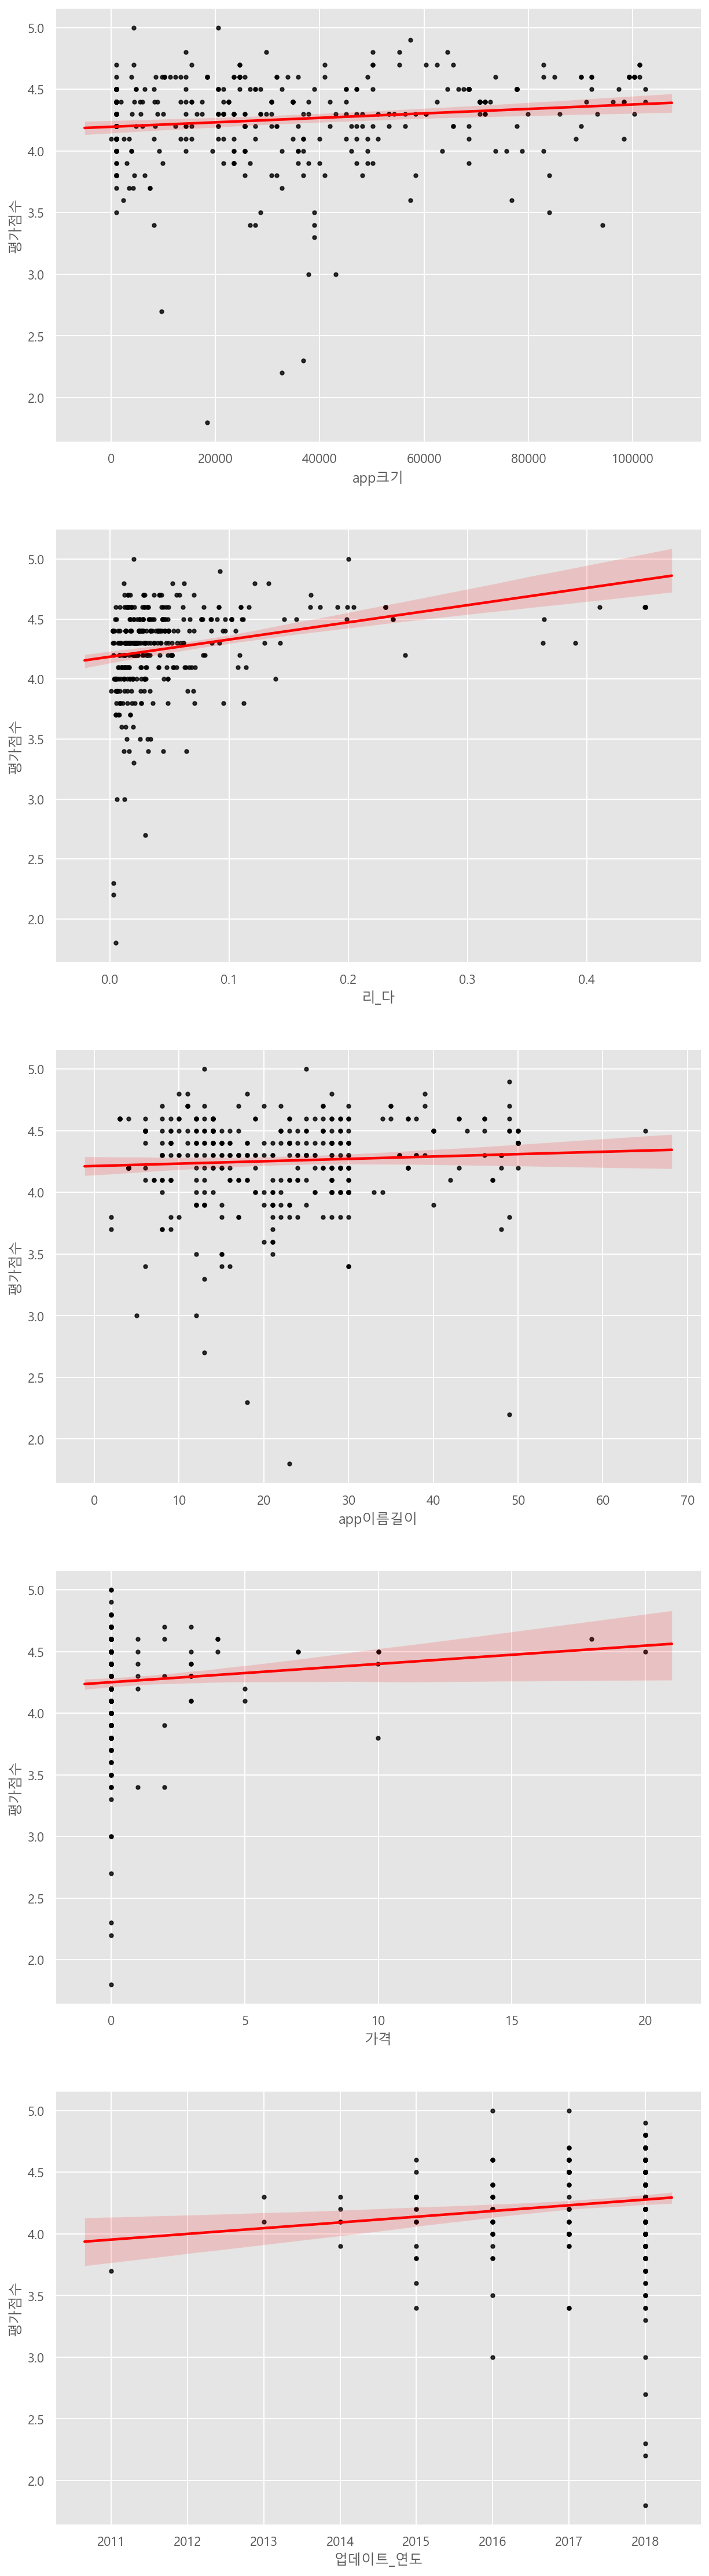

In [30]:
Graph(Everyone_10)

AttributeError: 'DataFrame' object has no attribute '업데이트_월'

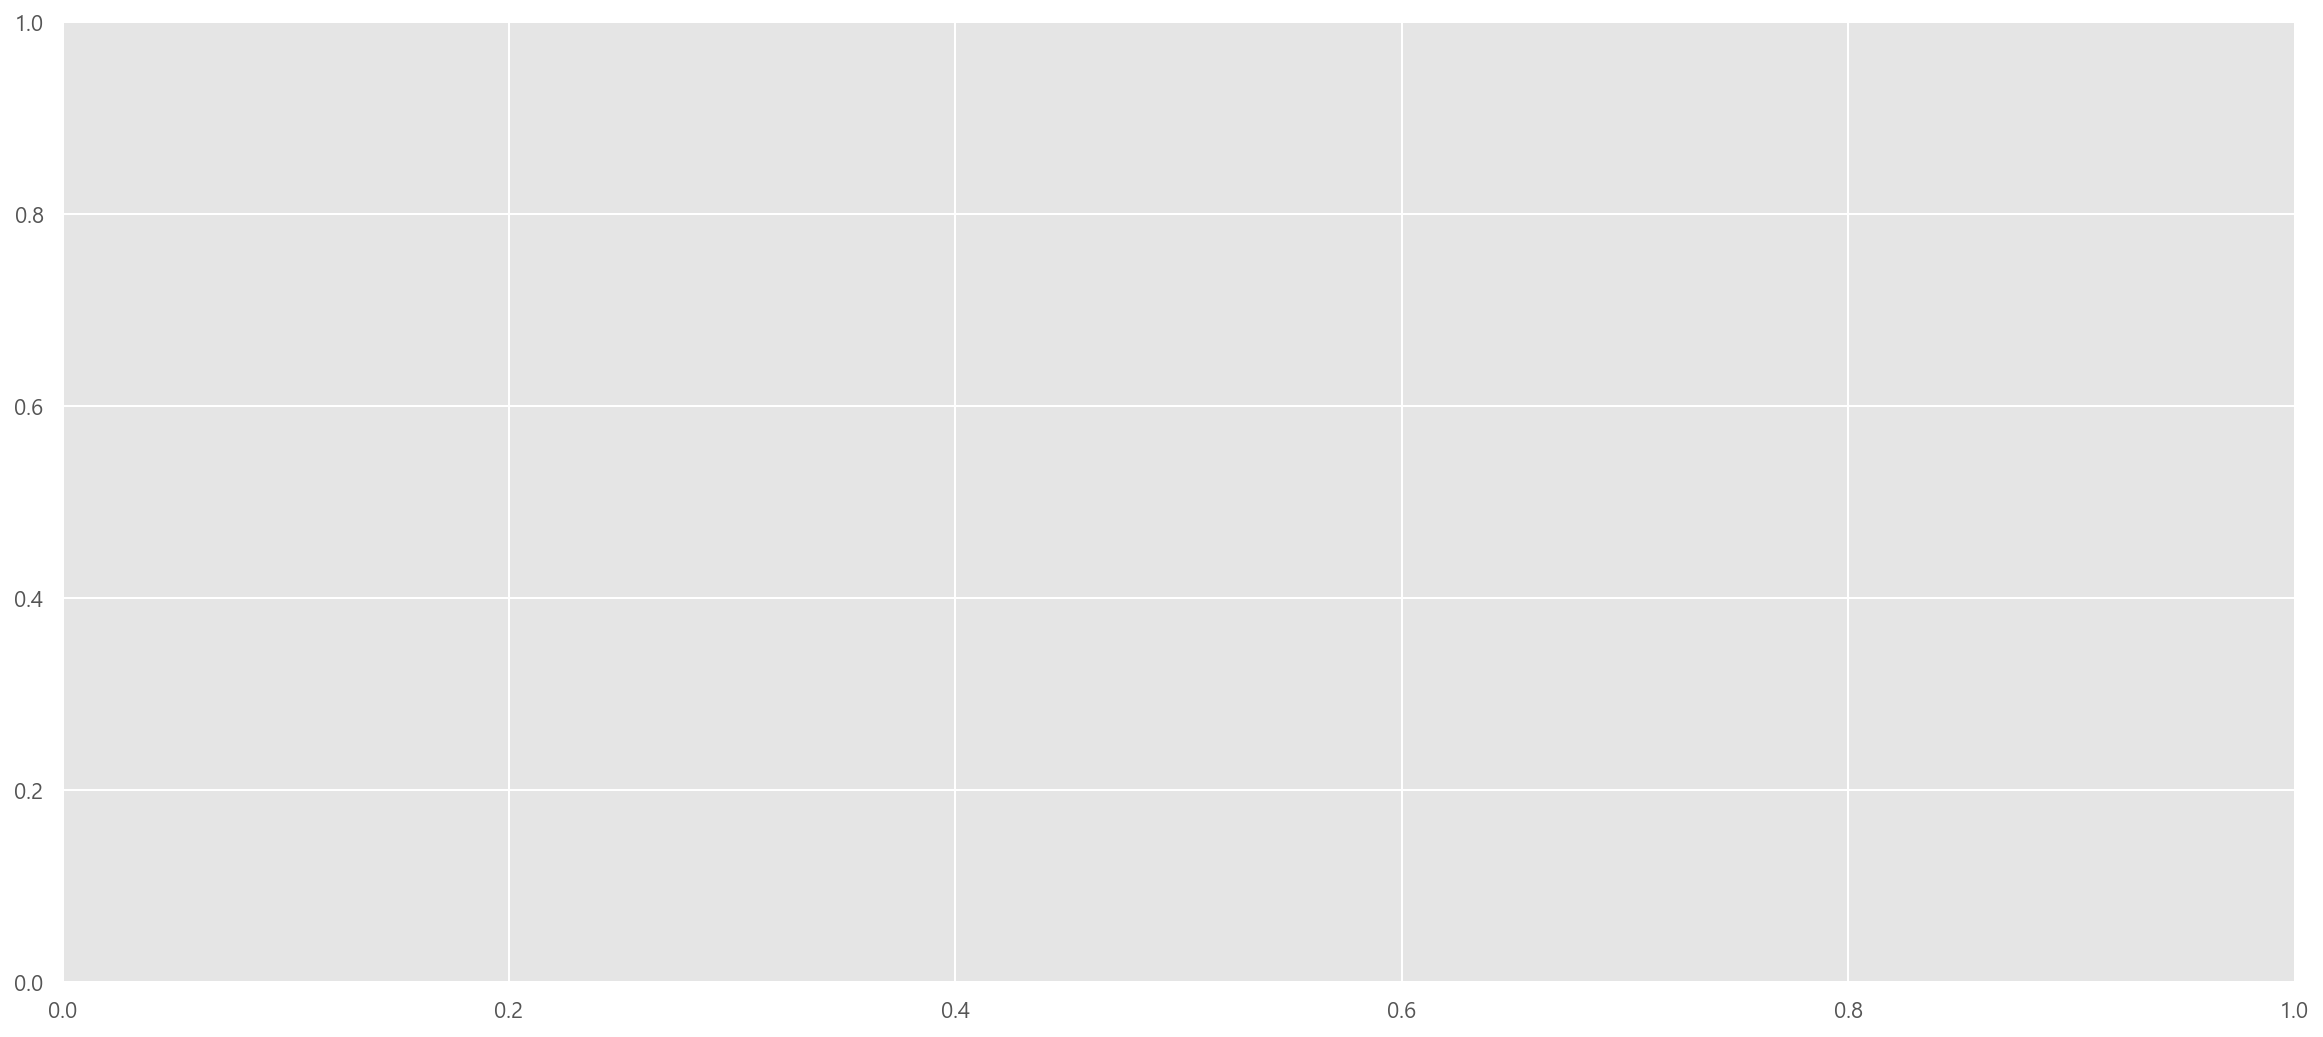

In [31]:
Distplot(Everyone_10)

In [32]:
def Cramer(data):
    from scipy.stats import chi2_contingency
    import numpy as np

    def cramers_V(var1,var2):
        crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
        stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
        obs = np.sum(crosstab) # Number of observations
        mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
        return (stat/(obs*mini))
    from sklearn import preprocessing

    label = preprocessing.LabelEncoder()
    data_encoded = pd.DataFrame() 

    for i in data.columns:
        data_encoded[i]=label.fit_transform(data[i])

    rows= []

    for var1 in data_encoded:
        col = []
        for var2 in data_encoded :
            cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
            col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
        rows.append(col)

    cramers_results = np.array(rows)
    df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
    return df

In [33]:
TTT = Everyone_10[['가격','유료구분']]

KeyError: "['유료구분'] not in index"

In [34]:
Cramer(TTT)

NameError: name 'TTT' is not defined

In [35]:
Everyone_10 = Everyone_10.drop(['유료구분','업데이트_월','업데이트_일'],axis = 1)

KeyError: "['유료구분' '업데이트_월' '업데이트_일'] not found in axis"

In [36]:
Everyone_10.리뷰수 = Everyone_10.리뷰수.apply(lambda x : int(x))

AttributeError: 'DataFrame' object has no attribute '리뷰수'

In [37]:
Everyone_10['리_다'] =  Everyone_10.리뷰수/Everyone_10.다운로드수

AttributeError: 'DataFrame' object has no attribute '리뷰수'

In [38]:
Everyone_10.corr()

,app크기,가격,app이름길이,업데이트_연도,리_다
app크기,1.000000,-0.111502,-0.111303,0.092505,0.205825
가격,-0.111502,1.000000,0.012117,-0.184506,0.312705
app이름길이,-0.111303,0.012117,1.000000,0.022789,-0.097169
업데이트_연도,0.092505,-0.184506,0.022789,1.000000,-0.152190
리_다,0.205825,0.312705,-0.097169,-0.152190,1.000000


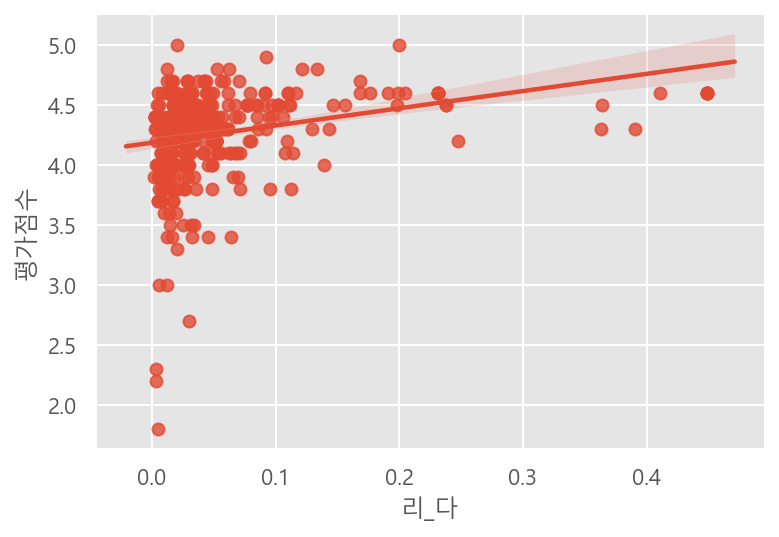

In [39]:
sns.regplot(Everyone_10.리_다, y)

In [40]:
Everyone_10 = Everyone_10.drop(['다운로드수','리뷰수'],axis =1 )

KeyError: "['다운로드수' '리뷰수'] not found in axis"

분석시작

In [41]:
Everyone_10 = sm.add_constant(Everyone_10,has_constant='add')

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [42]:
Everyone_10

,const,app크기,가격,app이름길이,업데이트_연도,리_다
22,1.0,4300.8,0.0,39,2018,0.015398
77,1.0,3993.6,0.0,36,2018,0.003574
141,1.0,9728.0,0.0,34,2017,0.044780
186,1.0,30720.0,0.0,28,2018,0.034116
308,1.0,4403.2,0.0,18,2018,0.003900
...,...,...,...,...,...,...
10419,1.0,50176.0,0.0,27,2016,0.028151
10639,1.0,38912.0,0.0,13,2018,0.020200
10779,1.0,76800.0,0.0,21,2018,0.013500
10784,1.0,86016.0,0.0,10,2018,0.024546


In [43]:
from sklearn.model_selection import LeaveOneOut,KFold

In [44]:
cv = KFold(4)
score_list = []
for i, (idx_train,idx_test) in enumerate(cv.split(Everyone_10)):
    train_x = Everyone_10.iloc[idx_train]
    train_y = y.reset_index().iloc[idx_train].set_index('index')
    test_x = Everyone_10.iloc[idx_test]
    test_y = y.reset_index().iloc[idx_test].set_index('index')
    model = sm.OLS(train_y,train_x)
    fitted_model = model.fit()
    print(fitted_model.summary())
    predict = fitted_model.predict(test_x)
    score_list.append(mean_squared_error(test_y,predict))

                            OLS Regression Results                            
Dep. Variable:                   평가점수   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     7.840
Date:                Tue, 16 Jun 2020   Prob (F-statistic):           6.09e-07
Time:                        02:08:54   Log-Likelihood:                -122.27
No. Observations:                 297   AIC:                             256.5
Df Residuals:                     291   BIC:                             278.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -84.2174     39.670     -2.123      0.0

In [45]:
# 처음 Baseline
np.array(score_list).mean()

0.1347396091810235

In [46]:
# 5개 summary를 보면서 한번이라도 0.05 이상 넘어가면 탈락!
Everyone_10 = Everyone_10.drop(['app크기','가격','app이름길이'],axis = 1)

app크기, 가격, 길이.. 별 신경 안쓰네..??

In [47]:
Everyone_10

,const,업데이트_연도,리_다
22,1.0,2018,0.015398
77,1.0,2018,0.003574
141,1.0,2017,0.044780
186,1.0,2018,0.034116
308,1.0,2018,0.003900
...,...,...,...
10419,1.0,2016,0.028151
10639,1.0,2018,0.020200
10779,1.0,2018,0.013500
10784,1.0,2018,0.024546


In [48]:
cv2 = KFold(4)
score_list2 = []
for i, (idx_train,idx_test) in enumerate(cv2.split(Everyone_10)):
    train_x = Everyone_10.iloc[idx_train]
    train_y = y.reset_index().iloc[idx_train].set_index('index')
    test_x = Everyone_10.iloc[idx_test]
    test_y = y.reset_index().iloc[idx_test].set_index('index')
    model = sm.OLS(train_y,train_x)
    fitted_model = model.fit()
    print(fitted_model.summary())
    predict = fitted_model.predict(test_x)
    score_list2.append(mean_squared_error(test_y,predict))

                            OLS Regression Results                            
Dep. Variable:                   평가점수   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     16.36
Date:                Tue, 16 Jun 2020   Prob (F-statistic):           1.83e-07
Time:                        02:09:09   Log-Likelihood:                -125.37
No. Observations:                 297   AIC:                             256.7
Df Residuals:                     294   BIC:                             267.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -92.9091     39.527     -2.351      0.0

In [49]:
np.array(score_list2).mean()

0.13190340522538552

적용

In [50]:
with open('Everyone_10_Test.pickle','rb') as f:
    Everyone_10_Test = pickle.load(f)

In [51]:
Everyone_10_Test.리뷰수 = Everyone_10_Test.리뷰수.apply(lambda x : int(x))

In [52]:
Everyone_10_Test['리_다'] = Everyone_10_Test.리뷰수 / Everyone_10_Test.다운로드수

In [53]:
Everyone_10_Test

,리뷰수,app크기,다운로드수,가격,장르,app이름길이,업데이트_월,업데이트_일,업데이트_연도,리_다
113,182,5836.8,100000,0.0,Beauty,25,9,20,2017,0.00182
130,35,3174.4,10000,0.0,Beauty,34,12,11,2017,0.00350
1024,6,9932.8,100,0.0,Events,33,7,31,2018,0.06000
2437,0,20480.0,10,0.0,Medical,18,7,26,2018,0.00000
4256,7,7372.8,1000,0.0,Sports,22,2,28,2018,0.00700
5253,0,8601.6,50,0.0,Entertainment,22,1,3,2018,0.00000
5753,0,1024.0,5,0.0,Strategy,2,8,28,2015,0.00000
5824,0,1024.0,50,0.0,Action,13,6,25,2018,0.00000
5967,0,5120.0,100,0.0,Maps & Navigation,29,2,19,2016,0.00000
6701,30,95232.0,100,0.0,Business,11,7,16,2018,0.30000


In [61]:
Everyone_10.shape

(397, 3)

In [54]:
Everyone_10_Test = Everyone_10_Test.drop(['리뷰수','다운로드수','app크기','가격','app이름길이','업데이트_월','업데이트_일'],axis = 1)

In [55]:
Everyone_10_Test = Everyone_10_Test.drop(['장르'],axis = 1)

In [56]:
Everyone_10_Test = sm.add_constant(Everyone_10_Test,has_constant = 'add')

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [57]:
Everyone_10_Test

,const,업데이트_연도,리_다
113,1.0,2017,0.00182
130,1.0,2017,0.00350
1024,1.0,2018,0.06000
2437,1.0,2018,0.00000
4256,1.0,2018,0.00700
5253,1.0,2018,0.00000
5753,1.0,2015,0.00000
5824,1.0,2018,0.00000
5967,1.0,2016,0.00000
6701,1.0,2018,0.30000


In [58]:
Result_predict = fitted_model.predict(Everyone_10_Test)

In [62]:
Result_predict.describe()

count    16.000000
mean      4.241369
std       0.133807
min       4.012554
25%       4.171096
50%       4.243901
75%       4.257818
max       4.651245
dtype: float64

In [63]:
Result_predict[Result_predict > 5]

Series([], dtype: float64)

In [60]:
with open('Everyone_10_result.pickle','wb') as f:
    pickle.dump(Result_predict,f)